In [10]:
import pandas as pd
import numpy as np
nsteps = 48
size_sim = 1000000
epochs = 100
T = 2
files = [
    f'../data/export/test/{size_sim}_{epochs}epochs/zerobond_1_normalize_True_test_results_sigma_0.01_dim_1_{T}_{size_sim}_{nsteps*T}_epochs_10.csv',
    f'../data/export/test/{size_sim}_{epochs}epochs/zerobond_1_normalize_True_test_results_sigma_0.01_dim_1_{T}_{size_sim}_{nsteps*T}_epochs_20.csv',
    f'../data/export/test/{size_sim}_{epochs}epochs/zerobond_1_normalize_True_test_results_sigma_0.01_dim_1_{T}_{size_sim}_{nsteps*T}_epochs_50.csv'
]
Ts = list(
    [
        10, 20, 50
    ]
)
test_df = pd.DataFrame()
for i, file in enumerate(files):
    test_df_tmp = pd.read_csv(
        file
    )
    test_df_tmp['epochs'] = Ts[i]
    # Concat
    test_df = pd.concat(
        [
            test_df,
            test_df_tmp
        ]
    )

In [11]:
# Relative error
test_df['ae'] = np.abs(test_df['V_est'] - test_df['V'])
test_df['error'] = test_df['V_est'] - test_df['V']
test_df['pae'] = np.abs(test_df['V_est'] - test_df['V'])/test_df['V']

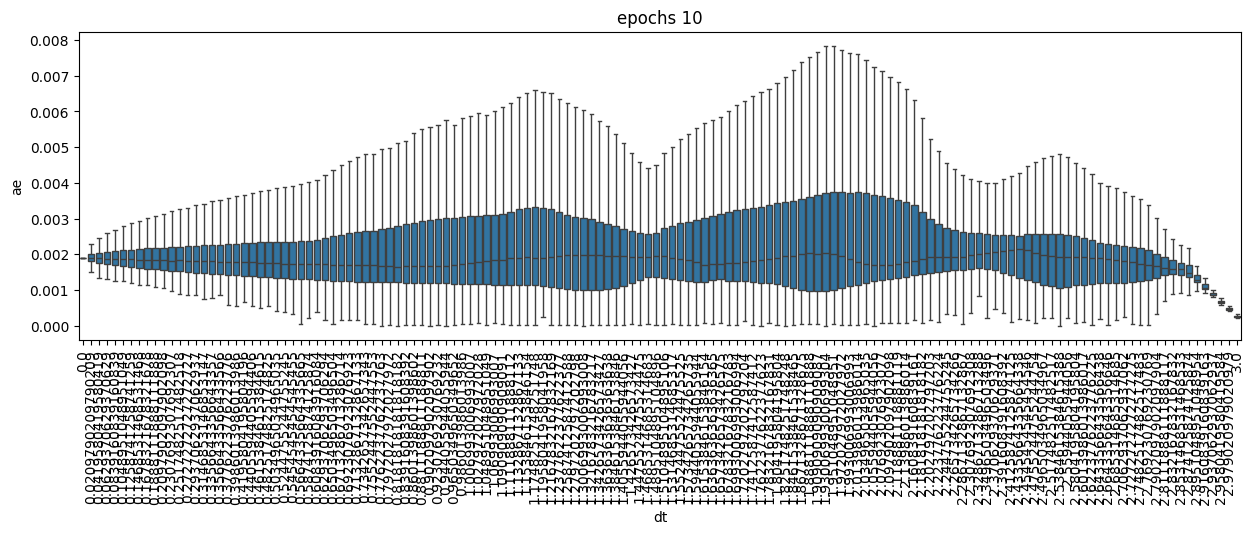

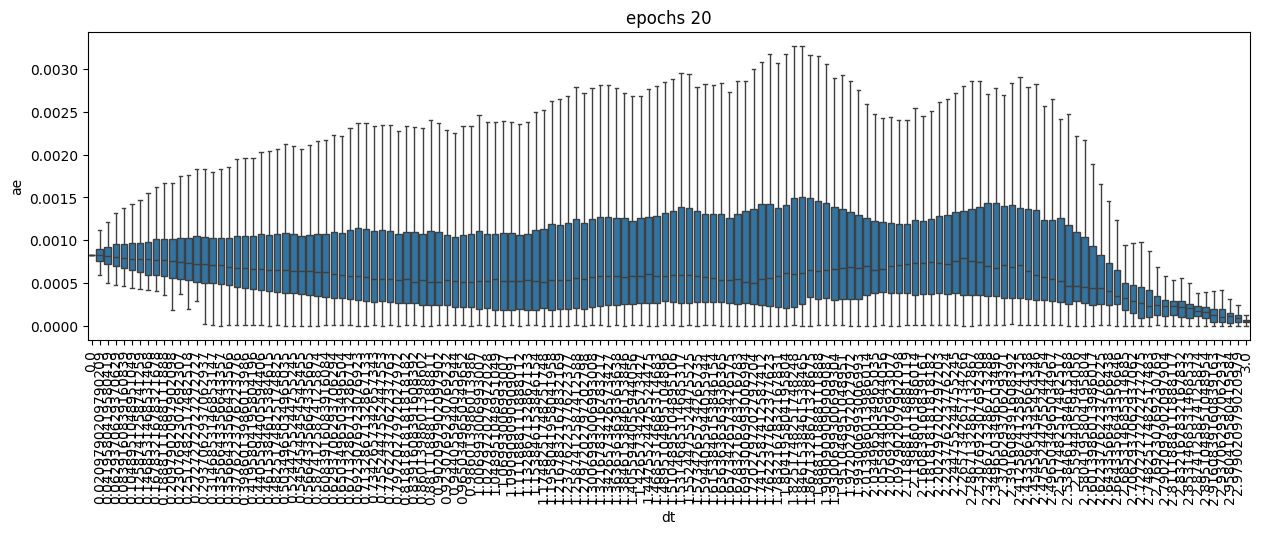

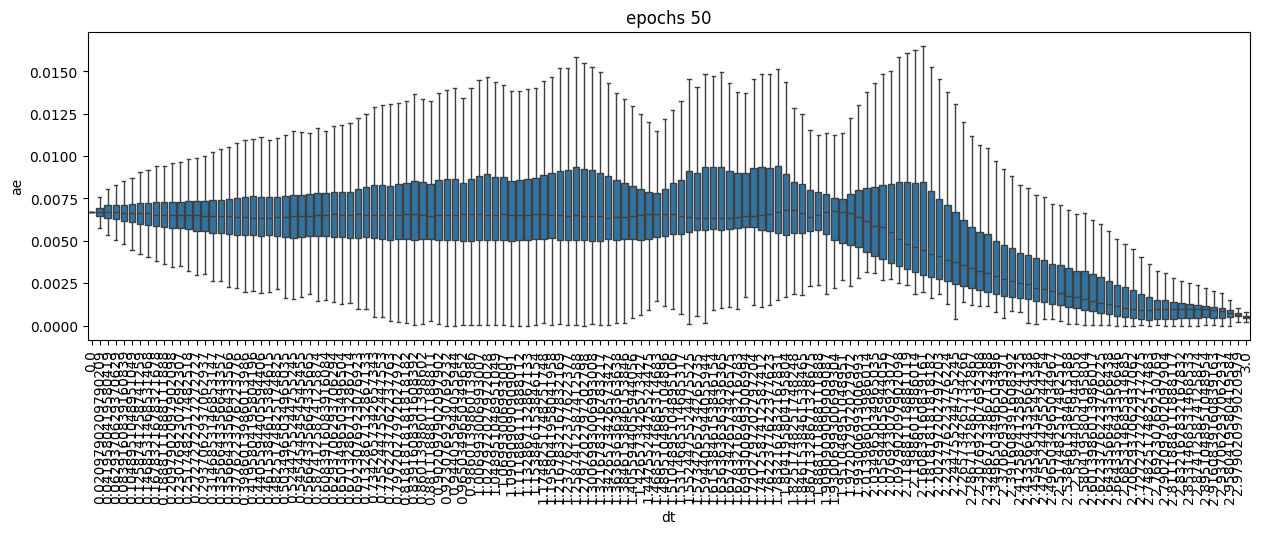

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

for t in Ts:
    plt.figure(
        figsize = (15, 4)
    )
    plt.title(f"epochs {t}")
    sns.boxplot(
        x = 'dt',
        y = 'ae',
        data = test_df.loc[
            test_df["epochs"] == t
        ],
        showfliers = False
    )
    plt.xticks(
        rotation = 90
    )
    plt.show()

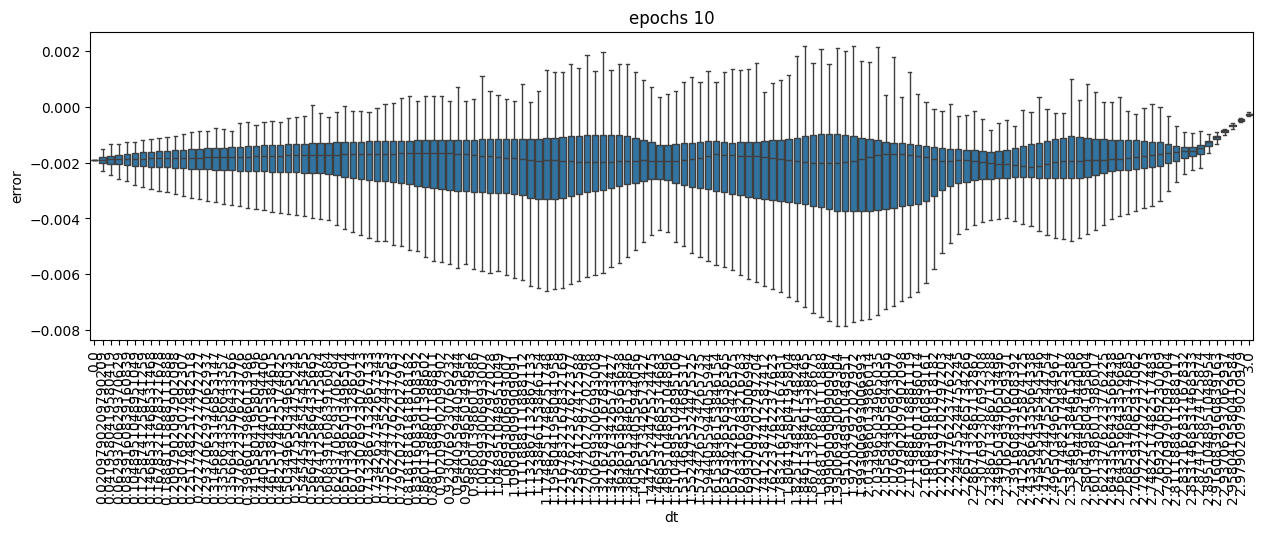

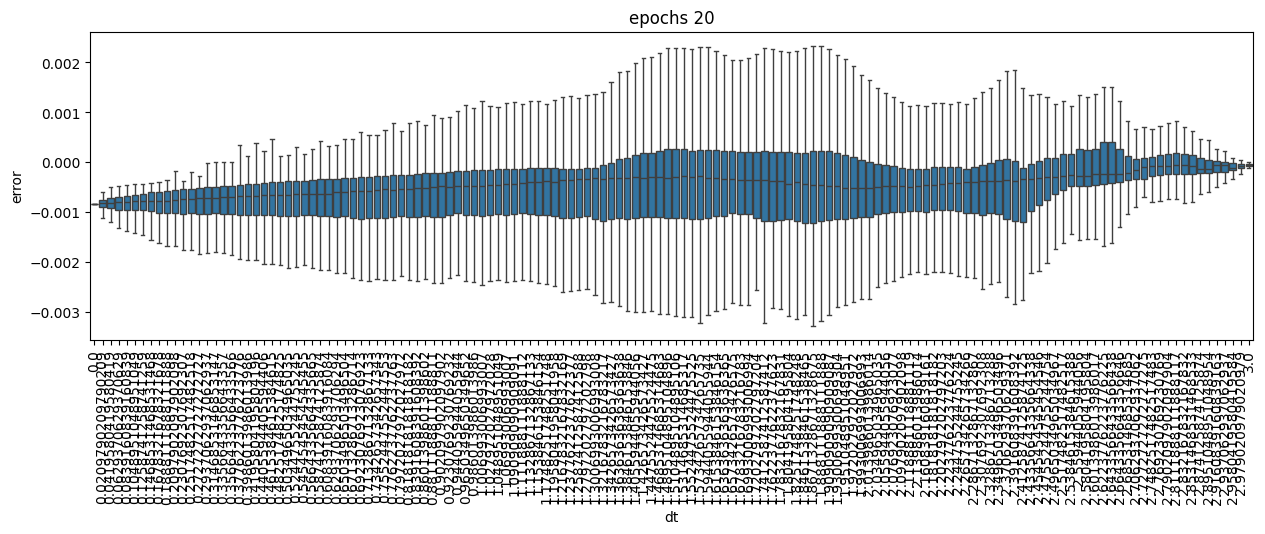

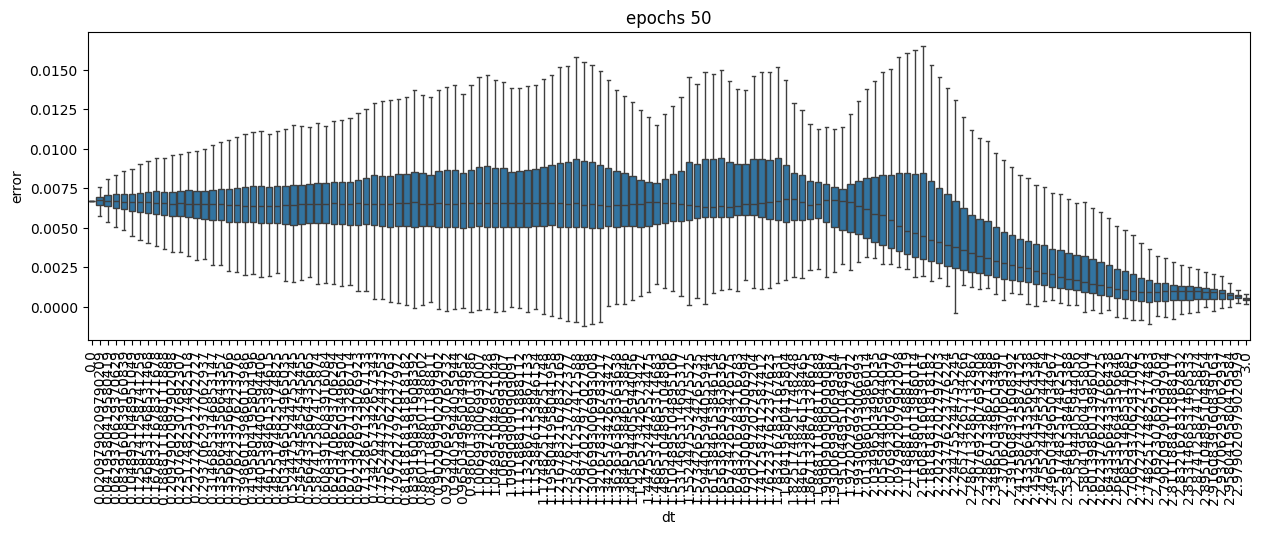

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

for t in Ts:
    plt.figure(
        figsize = (15, 4)
    )
    plt.title(f"epochs {t}")
    sns.boxplot(
        x = 'dt',
        y = 'error',
        data = test_df.loc[
            test_df["epochs"] == t
        ],
        showfliers = False
    )
    plt.xticks(
        rotation = 90
    )
    plt.show()